In [114]:
import pandas as pd
cust = pd.read_csv(r"C:\Users\ibeme\Downloads\Datasets\Customer_demo.csv")
trans = pd.read_csv(r"C:\Users\ibeme\Downloads\Datasets\Transactional_level.csv")

In [115]:
cust.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70
3,3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62
4,4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46


In [5]:
trans.head()

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [6]:
print("Total Records in customer dataset:",cust.shape[0])
print("Total Records in customer dataset:",cust.shape[1])

Total Records in customer dataset: 3912
Total Records in customer dataset: 14


In [7]:
print("Total Records in Transaction dataset:",trans.shape[0])
print("Total Records in Transaction dataset:",trans.shape[1])

Total Records in Transaction dataset: 19803
Total Records in Transaction dataset: 15


In [116]:
#merging both transactions and customer datset

merged_df = cust.merge(trans,how='inner',left_on='customer_id',right_on='customer_id')

In [117]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0_x                         19354 non-null  int64  
 1   customer_id                          19354 non-null  int64  
 2   first_name                           19354 non-null  object 
 3   last_name                            19354 non-null  object 
 4   gender                               19354 non-null  object 
 5   past_3_years_bike_related_purchases  19354 non-null  int64  
 6   DOB                                  19354 non-null  object 
 7   job_title                            19354 non-null  object 
 8   job_industry_category                19354 non-null  object 
 9   wealth_segment                       19354 non-null  object 
 10  deceased_indicator                   19354 non-null  object 
 11  owns_car                    

In [118]:
merged_df['transaction_date']=pd.to_datetime(merged_df['transaction_date'])

In [11]:
##RFM Analysis
merged_df.iloc[0]

Unnamed: 0_x                                             0
customer_id                                              1
first_name                                         Laraine
last_name                                        Medendorp
gender                                              Female
past_3_years_bike_related_purchases                     93
DOB                                             1953-10-12
job_title                              Executive Secretary
job_industry_category                               Health
wealth_segment                               Mass Customer
deceased_indicator                                       N
owns_car                                               Yes
tenure                                                11.0
Age                                                     70
Unnamed: 0_y                                            93
transaction_id                                          94
product_id                                              

In [119]:
max_trans_date = max(merged_df['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [120]:
from datetime import datetime

In [121]:
comparision_date =datetime.strptime(str(max_trans_date),"%Y-%m-%d")

In [122]:
rfm_table = merged_df.groupby(['customer_id']).agg({'transaction_date':lambda date:(comparision_date-date.max()),
                                       'product_id':'count',
                                       'Profit':'sum' })

In [123]:
rfm_table.rename(columns={'transaction_date':'recency',
                          'product_id':'Frequency',
                          'Profit':'Monetory'},inplace=True)

In [124]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['rec_quartile']=pd.qcut(rfm_table['recency'],4,['4','3','2','1'])
rfm_table['fre_quartile']=pd.qcut(rfm_table['Frequency'],4,['4','3','2','1'])
rfm_table['mon_quartile']=pd.qcut(rfm_table['Monetory'],4,['4','3','2','1'])

In [125]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score']=100*rfm_table['rec_quartile'].astype(int) + 10*rfm_table['fre_quartile'].astype(int)+rfm_table['mon_quartile'].astype(int)

In [19]:
rfm_table['customer_title']=pd.qcut(rfm_table['rfm_score'],4,['Bronze','Silver','Gold','Platinum'])

In [131]:
rfm_table

,recency,Frequency,Monetory,rec_quartile,fre_quartile,mon_quartile,rfm_score
customer_id,,,,,,,
1,7 days,11,3018.09,4,1,2,412
2,128 days,3,2226.26,1,4,3,143
3,102 days,8,3362.81,1,1,2,112
4,195 days,2,220.57,1,4,4,144
5,16 days,6,2394.94,4,3,3,433
...,...,...,...,...,...,...,...
3496,256 days,4,2045.84,1,4,3,143
3497,52 days,3,1648.32,2,4,4,244
3498,127 days,6,3147.33,1,3,2,132


In [137]:
import numpy as np
rfm_table['recency'] = rfm_table['recency'].dt.days.astype(int)

In [138]:
#Merging both RFM Table with Transaction and Customer Tables
cust_trans_rfm = pd.merge(merged_df, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')

In [139]:
cust_trans_rfm.iloc[0]

Unnamed: 0_x                                             0
customer_id                                              1
first_name                                         Laraine
last_name                                        Medendorp
gender                                              Female
past_3_years_bike_related_purchases                     93
DOB                                             1953-10-12
job_title                              Executive Secretary
job_industry_category                               Health
wealth_segment                               Mass Customer
deceased_indicator                                       N
owns_car                                               Yes
tenure                                                11.0
Age                                                     70
Unnamed: 0_y                                            93
transaction_id                                          94
product_id                                              

In [140]:
import math
cust_trans_rfm['Age_group']=cust_trans_rfm['Age'].apply(lambda x:(math.floor(x/10)+1)*10)

In [141]:
cust_trans_rfm['rfm_score'].describe()

count    19354.000000
mean       291.692002
std        106.378543
min        111.000000
25%        212.000000
50%        311.000000
75%        411.000000
max        444.000000
Name: rfm_score, dtype: float64

In [142]:

def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [143]:
cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup,axis=1)

In [144]:
def get_rank(cols):
    
    title = cols
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11
        

In [145]:
cust_trans_rfm['rank']=cust_trans_rfm['detail_cust_title'].apply(get_rank)

In [146]:
cust_trans_rfm.iloc[0]

Unnamed: 0_x                                             0
customer_id                                              1
first_name                                         Laraine
last_name                                        Medendorp
gender                                              Female
past_3_years_bike_related_purchases                     93
DOB                                             1953-10-12
job_title                              Executive Secretary
job_industry_category                               Health
wealth_segment                               Mass Customer
deceased_indicator                                       N
owns_car                                               Yes
tenure                                                11.0
Age                                                     70
Unnamed: 0_y                                            93
transaction_id                                          94
product_id                                              

In [147]:
#Exporting to CSV File

cust_trans_rfm.to_csv(r"C:\Users\ibeme\Downloads\Datasets\Customer_Trans_RFM_Analysis.csv", index=False)

In [148]:
#3. Data Analysis and Exploration
#3.1. New Customer vs Old Customer Age Distributions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the New Customers Dataset

new_cust = pd.read_csv(r"C:\Users\ibeme\Downloads\Datasets\NewCustomerlist.csv")

In [149]:
new_cust.head()

,Unnamed: 0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_group
0,0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66,70
1,1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53,60
2,2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49,50
3,3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,45,50
4,4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58,60


In [150]:
new_cust['Age_group'].describe()

count    983.000000
mean      57.761953
std       17.422400
min       30.000000
25%       50.000000
50%       60.000000
75%       70.000000
max       90.000000
Name: Age_group, dtype: float64

<AxesSubplot:xlabel='Age_group', ylabel='Count'>

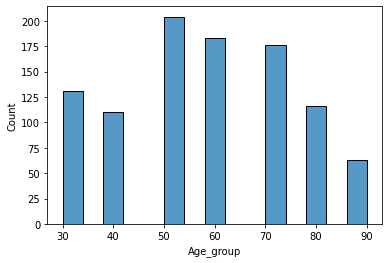

In [151]:
sns.histplot(new_cust['Age_group'],bins=15)

<AxesSubplot:xlabel='Age_group', ylabel='Count'>

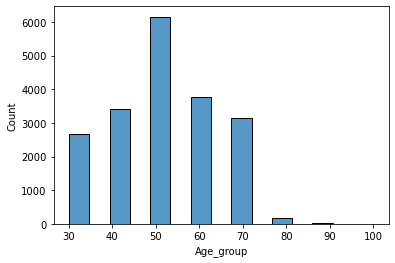

In [152]:
sns.histplot(cust_trans_rfm['Age_group'],bins=15)

In [153]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases':'sum'}).reset_index()

In [154]:
cust_bike_purchase_by_gender['percent_of_total']= (100*cust_bike_purchase_by_gender['past_3_years_bike_related_purchases'])/sum(cust_bike_purchase_by_gender['past_3_years_bike_related_purchases'])

In [155]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


<AxesSubplot:xlabel='gender', ylabel='percent_of_total'>

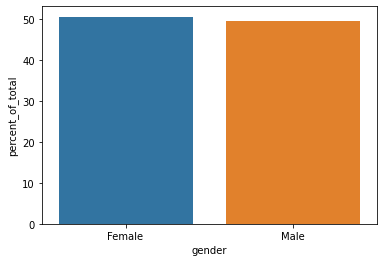

In [156]:
sns.barplot(data=cust_bike_purchase_by_gender,x='gender',y='percent_of_total')

In [157]:
new_cust.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'Age', 'Age_group'],
      dtype='object')

<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

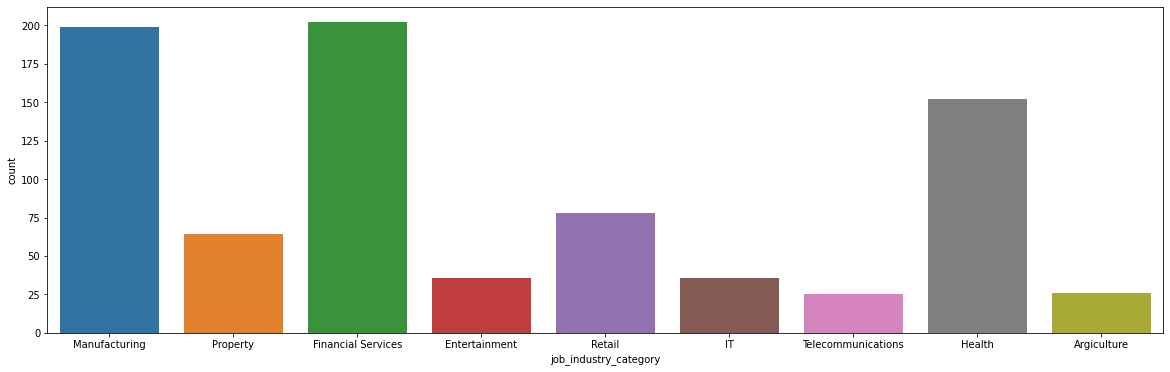

In [158]:
#Job Industry Customer Distribution
plt.figure(figsize=(20,6))

sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category'] =="Missing")])
#sns.histplot(new_cust[new_cust['job_industry_category'] =="Missing"])

<AxesSubplot:xlabel='Age_group', ylabel='count'>

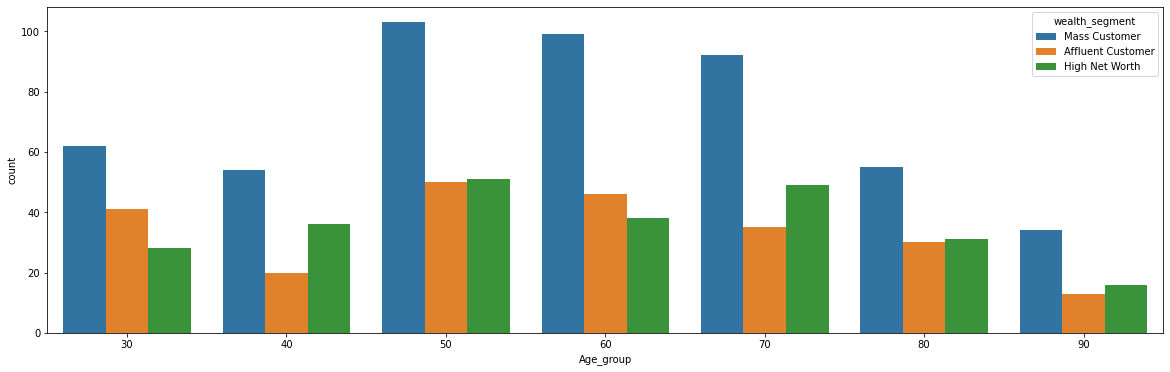

In [81]:
#Wealth segmentation by Age Group for New customers

plt.figure(figsize=(20,6))

sns.countplot(x='Age_group',hue='wealth_segment',data=new_cust)


<AxesSubplot:xlabel='Age_group', ylabel='count'>

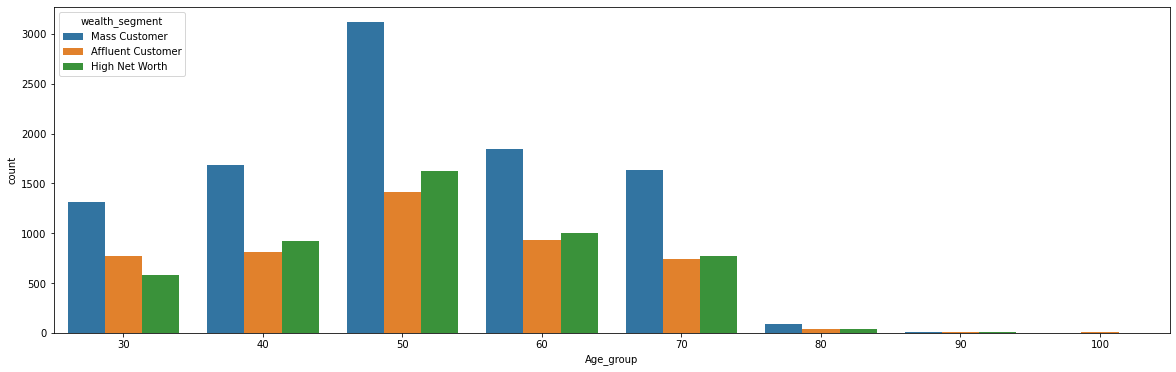

In [159]:
plt.figure(figsize=(20,6))

sns.countplot(x='Age_group',hue='wealth_segment',data=cust_trans_rfm)

In [160]:
cust_address_info = pd.read_csv(r"C:\Users\ibeme\Downloads\Datasets\Customer_address.csv")

In [161]:
merged_df = cust_trans_rfm.merge(cust_address_info, left_on = 'customer_id',right_on = 'customer_id',how = 'inner')

In [162]:
state_car_owners=merged_df[['state','owns_car','customer_id']].drop_duplicates().groupby(['state','owns_car']).agg({'customer_id':'count'}).reset_index()

In [163]:
state_car_owners.rename(columns={'customer_id':'Number of Customers'}, inplace=True)

<AxesSubplot:xlabel='state', ylabel='Number of Customers'>

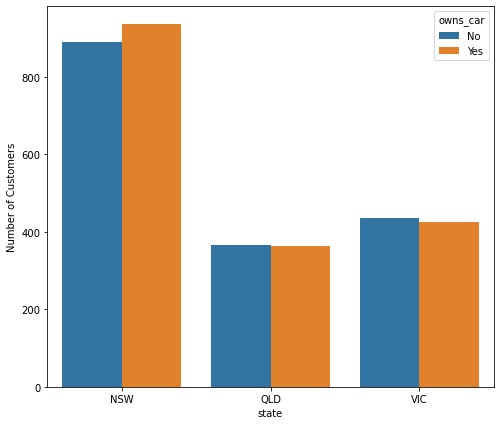

In [164]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)

In [165]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0_x                         19354 non-null  int64         
 1   customer_id                          19354 non-null  int64         
 2   first_name                           19354 non-null  object        
 3   last_name                            19354 non-null  object        
 4   gender                               19354 non-null  object        
 5   past_3_years_bike_related_purchases  19354 non-null  int64         
 6   DOB                                  19354 non-null  object        
 7   job_title                            19354 non-null  object        
 8   job_industry_category                19354 non-null  object        
 9   wealth_segment                       19354 non-null  object        
 10  deceased_i

<AxesSubplot:xlabel='Frequency', ylabel='Monetory'>

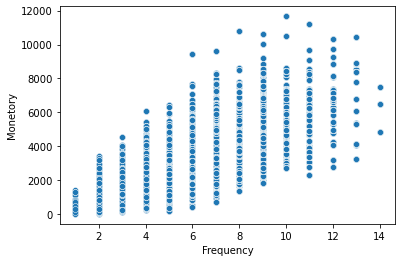

In [166]:
# RFM Analysis Scatter Plot
sns.scatterplot(x=cust_trans_rfm['Frequency'].astype(int),y=cust_trans_rfm['Monetory'].astype(int))

<AxesSubplot:xlabel='recency', ylabel='Monetory'>

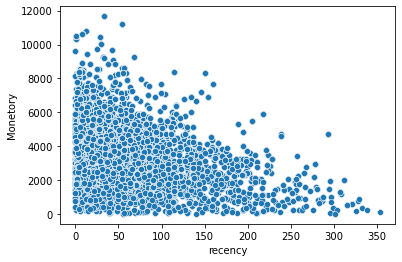

In [167]:
# RFM Analysis Scatter Plot
sns.scatterplot(x=cust_trans_rfm['recency'],y=cust_trans_rfm['Monetory'].astype(int))